In [270]:
import warnings
warnings.filterwarnings('ignore')

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

In [272]:
import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []

    actual_delito_tipo = None
    encontrado_delito_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        # Detect if the row represents a delito tipo. 
        if not encontrado_delito_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            actual_delito_tipo = cell_a_value
            encontrado_delito_tipo = True  
            continue 
        
        # After a delito tipo, the next rows are age  until the next delito tipo.

        if cell_a_value and encontrado_delito_tipo:
            edad = cell_a_value  

            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([actual_delito_tipo, edad, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito tipos
        if cell_a_value == None:
            encontrado_delito_tipo = False

    df = pd.DataFrame(data, columns=['tipo de delito', 'edad', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'edad.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['edad'] = df['edad'].str.strip()
df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

df = df[df['edad'] != 'Total']
df = df[df['tipo_de_delito'] != 'Delitos']
df_año = df
df_año

,tipo_de_delito,edad,año,Value
110,Homicidio y sus formas,De 18 a 20 años,2022,106
111,Homicidio y sus formas,De 18 a 20 años,2021,91
112,Homicidio y sus formas,De 18 a 20 años,2020,72
113,Homicidio y sus formas,De 18 a 20 años,2019,73
114,Homicidio y sus formas,De 18 a 20 años,2018,79
...,...,...,...,...
1395,Resto de delitos,71 y más años,2017,120
1396,Resto de delitos,71 y más años,2016,131
1397,Resto de delitos,71 y más años,2015,85
1398,Resto de delitos,71 y más años,2014,57


In [273]:

grouped = df_año.groupby(['tipo_de_delito', 'edad','año'])['Value'].sum().reset_index(name='total_delitos')
total_delitos_delito= df_año.groupby(['tipo_de_delito','año'])['Value'].sum().reset_index(name='delitotipo_total')
merged_edad= pd.merge(grouped, total_delitos_delito, on=['tipo_de_delito','año'])
merged_edad['porcentaje'] = (merged_edad['total_delitos'] / merged_edad['delitotipo_total']) * 100



In [274]:
merged_edad

,tipo_de_delito,edad,año,total_delitos,delitotipo_total,porcentaje
0,Contra el orden público,71 y más años,2013,39,12744,0.306026
1,Contra el orden público,De 18 a 20 años,2013,1215,12744,9.533898
2,Contra el orden público,De 21 a 25 años,2013,2169,12744,17.019774
3,Contra el orden público,De 26 a 30 años,2013,2180,12744,17.106089
4,Contra el orden público,De 31 a 35 años,2013,2175,12744,17.066855
...,...,...,...,...,...,...
1165,Torturas e integridad moral,De 31 a 35 años,2022,1425,9842,14.478764
1166,Torturas e integridad moral,De 36 a 40 años,2022,1538,9842,15.626905
1167,Torturas e integridad moral,De 41 a 50 años,2022,2779,9842,28.236131
1168,Torturas e integridad moral,De 51 a 60 años,2022,1221,9842,12.406015


In [275]:

import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    actual_region_tipo = None
    encontrado_region_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a delito type. 

        if not encontrado_region_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            actual_region_tipo = cell_a_value
            encontrado_region_tipo = True  
            continue 
        
        # After a delito type, the next rows are age  until the next delito type.

        if cell_a_value and encontrado_region_tipo:
            edad = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([actual_region_tipo, edad, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito types
        if cell_a_value == None:
            encontrado_region_tipo = False

    df = pd.DataFrame(data, columns=['Region', 'tipo_de_delito', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'Comautonoma.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()
df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_delito = df
df_region_delito

,Region,tipo_de_delito,año,Value
150,Andalucía,Homicidio y sus formas,2022,172
151,Andalucía,Homicidio y sus formas,2021,176
152,Andalucía,Homicidio y sus formas,2020,174
153,Andalucía,Homicidio y sus formas,2019,191
154,Andalucía,Homicidio y sus formas,2018,219
...,...,...,...,...
2795,Melilla,Resto de delitos,2017,107
2796,Melilla,Resto de delitos,2016,95
2797,Melilla,Resto de delitos,2015,89
2798,Melilla,Resto de delitos,2014,55


In [276]:
result_edad_df = pd.merge(df_region_delito, merged_edad, on=['tipo_de_delito', 'año'], how='left')


In [277]:
result_edad_df['final_value'] = ((result_edad_df['Value'] * result_edad_df['porcentaje'])/100)
result_edad_df

,Region,tipo_de_delito,año,Value,edad,total_delitos,delitotipo_total,porcentaje,final_value
0,Andalucía,Homicidio y sus formas,2022,172,71 y más años,22,1088,2.022059,3.477941
1,Andalucía,Homicidio y sus formas,2022,172,De 18 a 20 años,106,1088,9.742647,16.757353
2,Andalucía,Homicidio y sus formas,2022,172,De 21 a 25 años,127,1088,11.672794,20.077206
3,Andalucía,Homicidio y sus formas,2022,172,De 26 a 30 años,139,1088,12.775735,21.974265
4,Andalucía,Homicidio y sus formas,2022,172,De 31 a 35 años,110,1088,10.110294,17.389706
...,...,...,...,...,...,...,...,...,...
22225,Melilla,Resto de delitos,2013,48,De 31 a 35 años,534,3721,14.350981,6.888471
22226,Melilla,Resto de delitos,2013,48,De 36 a 40 años,539,3721,14.485353,6.952970
22227,Melilla,Resto de delitos,2013,48,De 41 a 50 años,856,3721,23.004569,11.042193
22228,Melilla,Resto de delitos,2013,48,De 51 a 60 años,586,3721,15.748455,7.559258


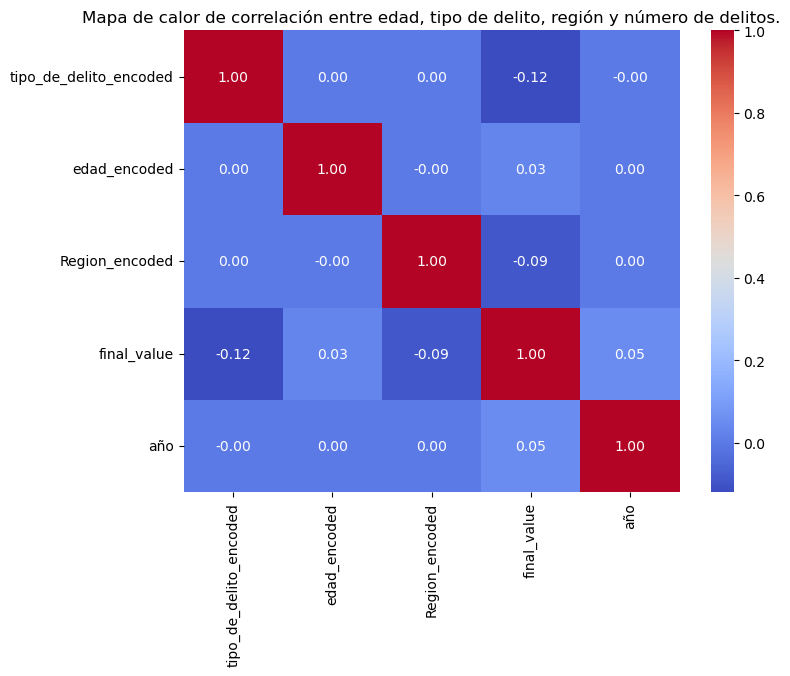

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered_summ = result_edad_df
# Encoding 'tipo_de_delito' and 'edad'
df_filtered_summ['tipo_de_delito_encoded'] = df_filtered_summ['tipo_de_delito'].astype('category').cat.codes
df_filtered_summ['Region_encoded'] = df_filtered_summ['Region'].astype('category').cat.codes
df_filtered_summ['edad_encoded'] = df_filtered_summ['edad'].astype('category').cat.codes
# Calculate correlations among encoded variables and 'Value'
corr = df_filtered_summ[['tipo_de_delito_encoded', 'edad_encoded','Region_encoded', 'final_value','año']].corr()

# Plotting heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre edad, tipo de delito, región y número de delitos.')
plt.show()

In [279]:
#No of delitos and type of delito commited got a slight negative correlation
#No of delitos and region got a slight negative correlation

In [280]:

df_summary = df_filtered_summ.groupby('año')['final_value'].sum().reset_index()
df_summary['año'] = pd.to_datetime(df_summary['año'].astype(str) + '-12-31')
df_summary.set_index('año', inplace=True)

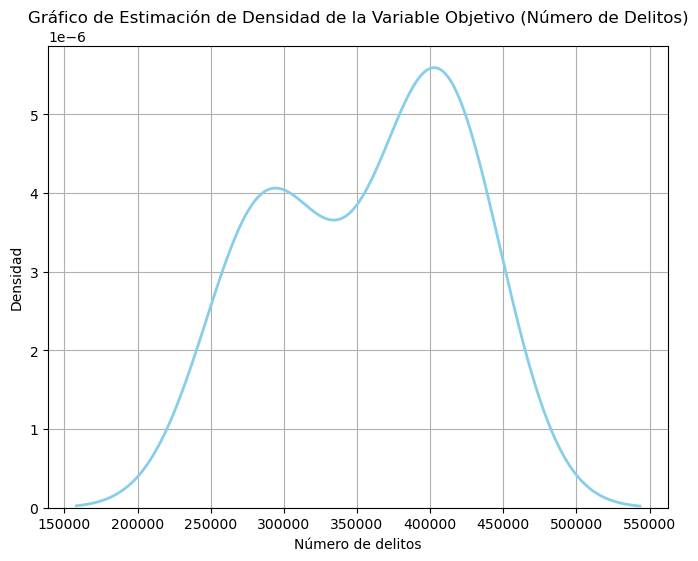

In [281]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df_summary['final_value'], color='skyblue', linewidth=2)
plt.title('Gráfico de Estimación de Densidad de la Variable Objetivo (Número de Delitos)')
plt.xlabel('Número de delitos')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [282]:
#analysis is that the no of delitos  is not balanced as there is right skewed

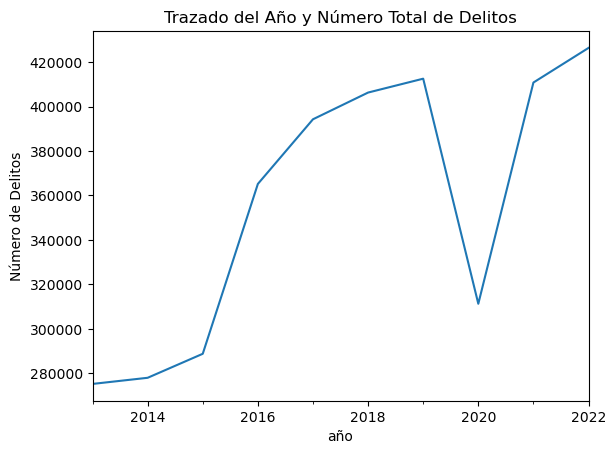

In [283]:
df_summary['final_value'].plot(title='Trazado del Año y Número Total de Delitos')
plt.ylabel('Número de Delitos')
plt.show()

In [284]:
#The drop in delitos in 2020 can be due to corona

In [285]:
#Forecast for the total no of delitos

In [286]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

result = adfuller(df_summary['final_value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpret the p-value
if result[1] > 0.05:
    print('La serie no es estacionaria')
else:
    print('La serie es estacionaria')

ADF Statistic: -1.531571
p-value: 0.517840
La serie no es estacionaria


In [287]:
from pmdarima.arima import auto_arima

model = auto_arima(df_summary['final_value'], start_p=0, start_q=0,
                   test='adf',       
                   max_p=3, max_q=3,
                   m=1,           
                   d=None,          
                   seasonal=False,  
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=209.358, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=210.032, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=208.400, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=207.575, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=209.359, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.209 seconds


In [288]:
#Considering order of 0 ,2, 0 for order 

model = ARIMA(df_summary['final_value'], order=(0,2,0))
model_fit = model.fit()
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            final_value   No. Observations:                   10
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -102.787
Date:                Tue, 19 Mar 2024   AIC                            207.575
Time:                        17:12:34   BIC                            207.654
Sample:                    12-31-2013   HQIC                           207.039
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.591e+09    2.4e+09      2.750      0.006    1.89e+09    1.13e+10
Ljung-Box (L1) (Q):                   4.14   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.04   Pr

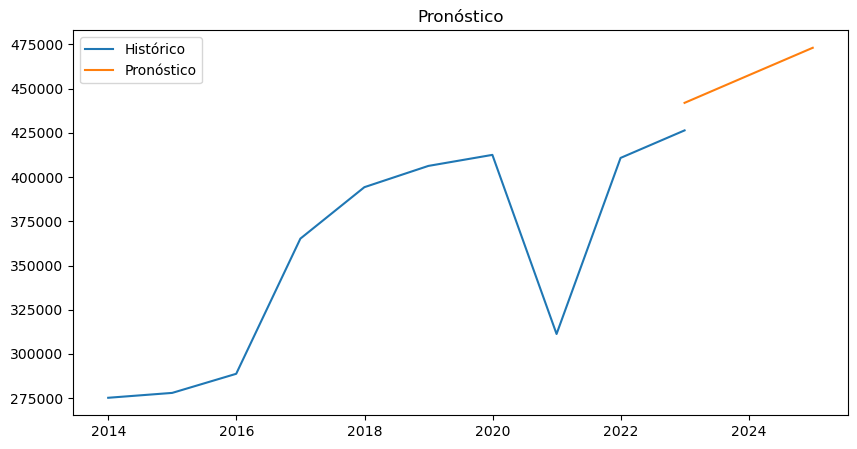

                Fecha  Pronóstico
2023-12-31 2022-12-31    441990.0
2024-12-31 2023-12-31    457564.0
2025-12-31 2024-12-31    473138.0


In [289]:
# Forecast the next 2 years

Pronóstico_dates = pd.date_range(df_summary.index[-1], periods=3, freq='A')

Pronóstico = model_fit.forecast(steps=len(Pronóstico_dates))

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df_summary.index, df_summary['final_value'], label='Histórico')
plt.plot(Pronóstico_dates, Pronóstico, label='Pronóstico')  
plt.title('Pronóstico')
plt.legend()
plt.show()

# Create a DataFrame for the forecast
Pronóstico_df = pd.DataFrame({
    'Fecha': Pronóstico_dates,
    'Pronóstico': Pronóstico
})

print(Pronóstico_df)

In [290]:
df_filtered_summ

,Region,tipo_de_delito,año,Value,edad,total_delitos,delitotipo_total,porcentaje,final_value,tipo_de_delito_encoded,Region_encoded,edad_encoded
0,Andalucía,Homicidio y sus formas,2022,172,71 y más años,22,1088,2.022059,3.477941,9,0,0
1,Andalucía,Homicidio y sus formas,2022,172,De 18 a 20 años,106,1088,9.742647,16.757353,9,0,1
2,Andalucía,Homicidio y sus formas,2022,172,De 21 a 25 años,127,1088,11.672794,20.077206,9,0,2
3,Andalucía,Homicidio y sus formas,2022,172,De 26 a 30 años,139,1088,12.775735,21.974265,9,0,3
4,Andalucía,Homicidio y sus formas,2022,172,De 31 a 35 años,110,1088,10.110294,17.389706,9,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
22225,Melilla,Resto de delitos,2013,48,De 31 a 35 años,534,3721,14.350981,6.888471,11,14,4
22226,Melilla,Resto de delitos,2013,48,De 36 a 40 años,539,3721,14.485353,6.952970,11,14,5
22227,Melilla,Resto de delitos,2013,48,De 41 a 50 años,856,3721,23.004569,11.042193,11,14,6
22228,Melilla,Resto de delitos,2013,48,De 51 a 60 años,586,3721,15.748455,7.559258,11,14,7


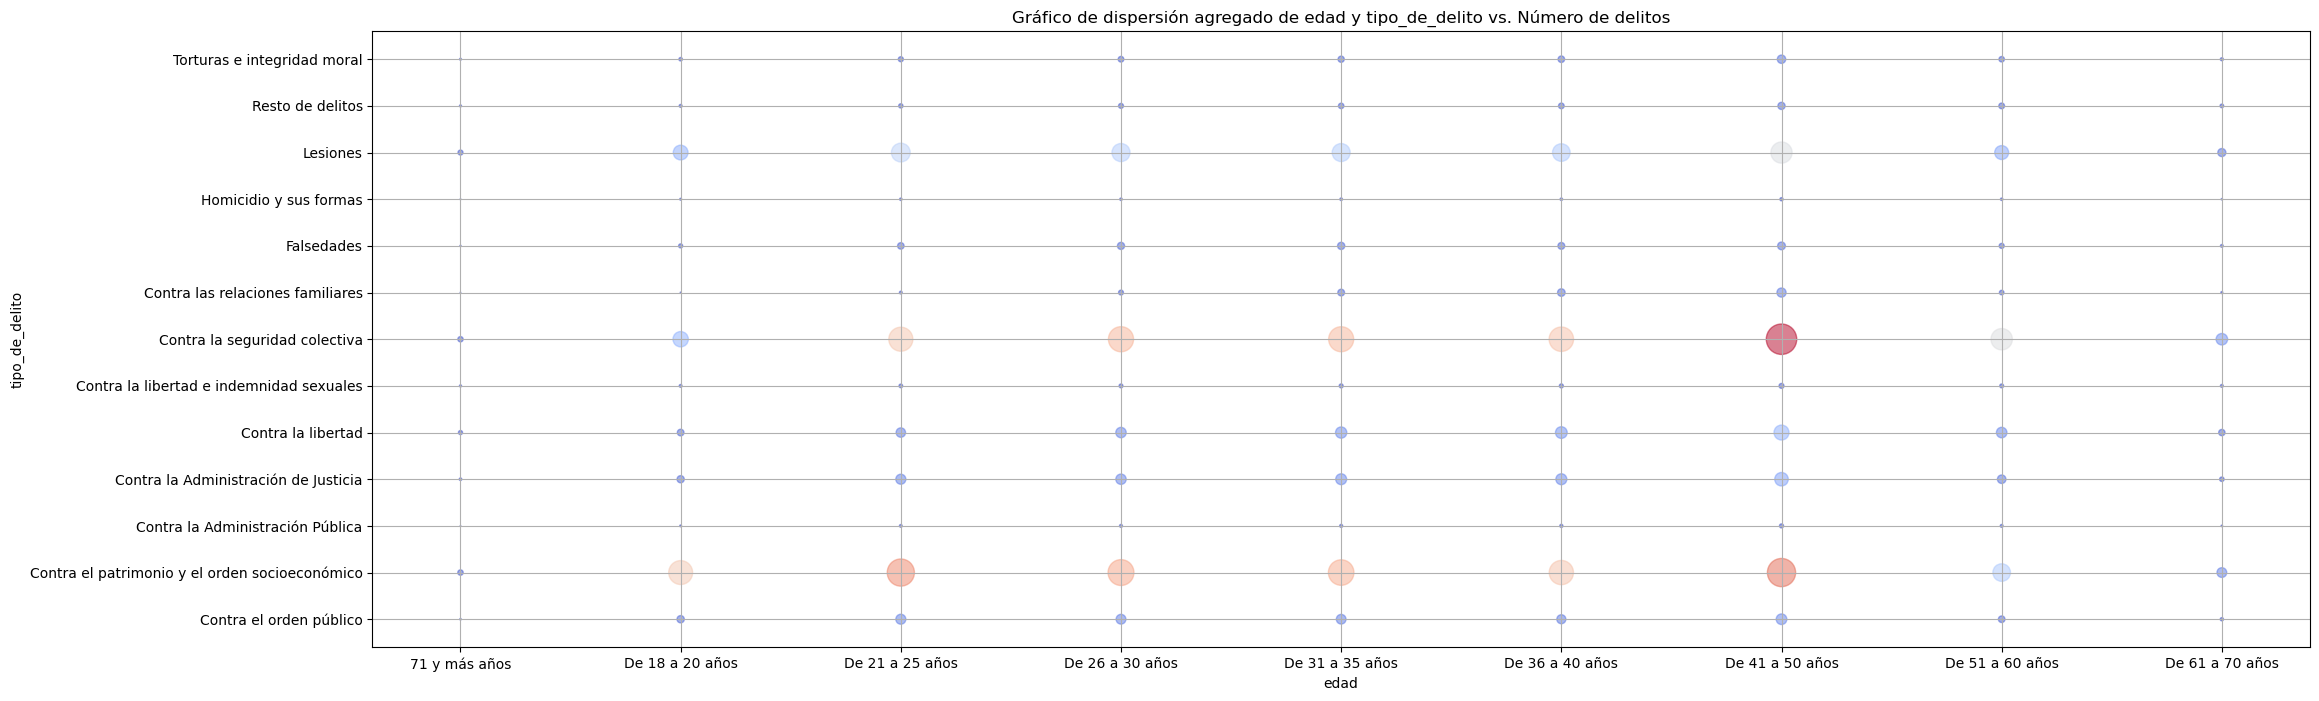

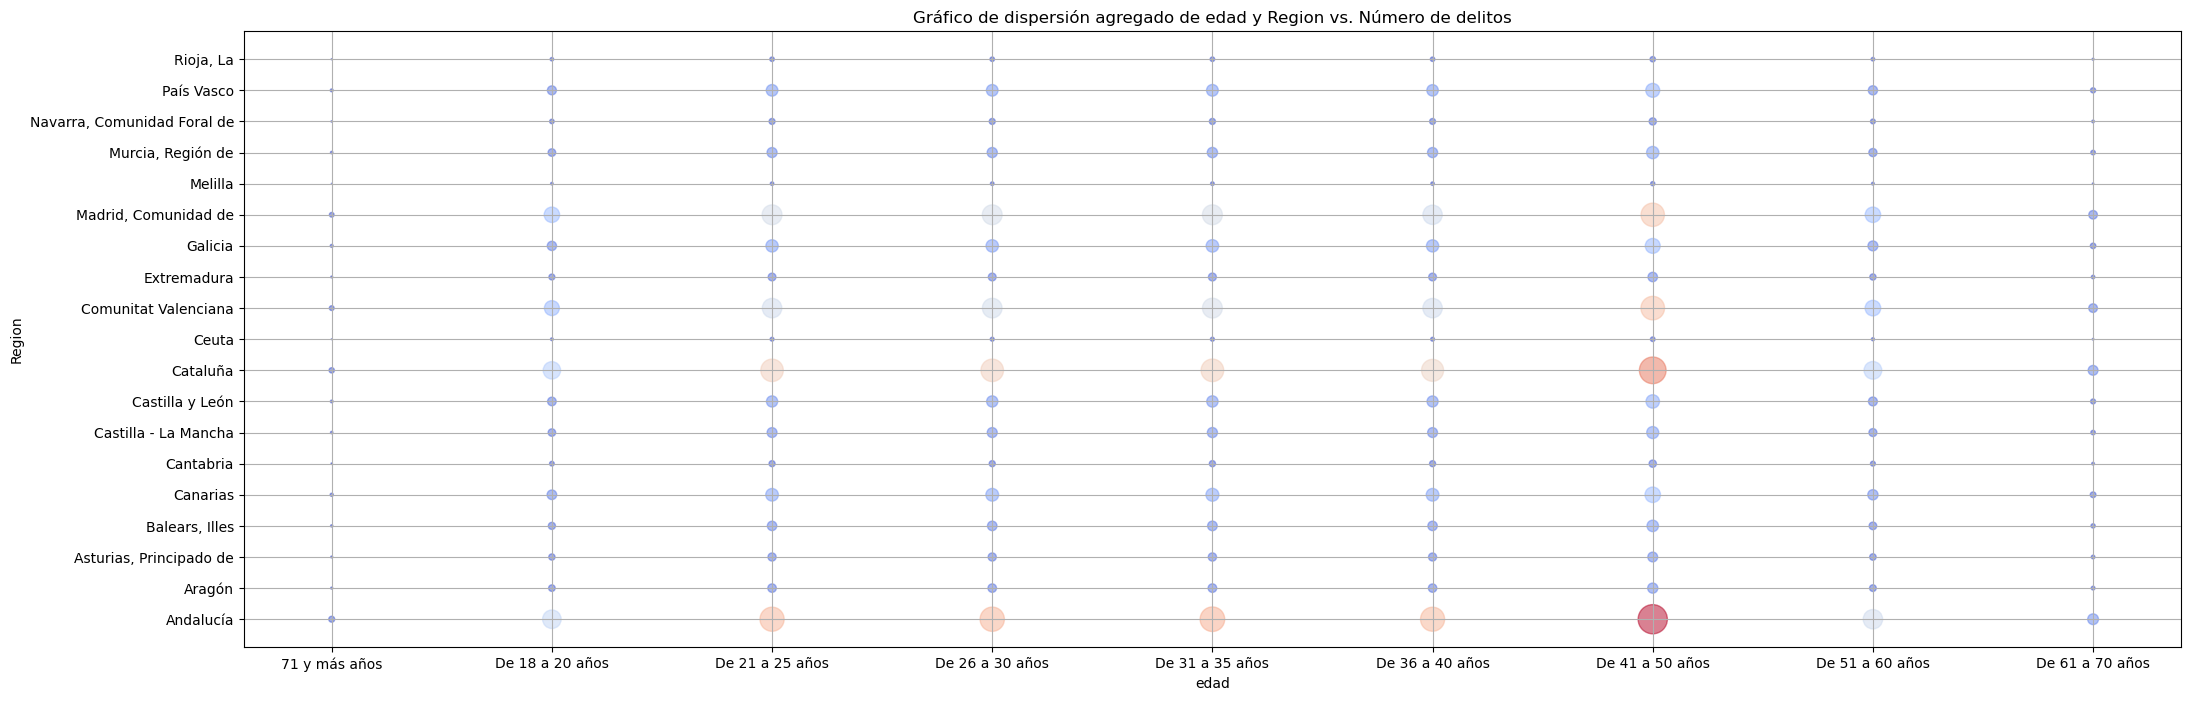

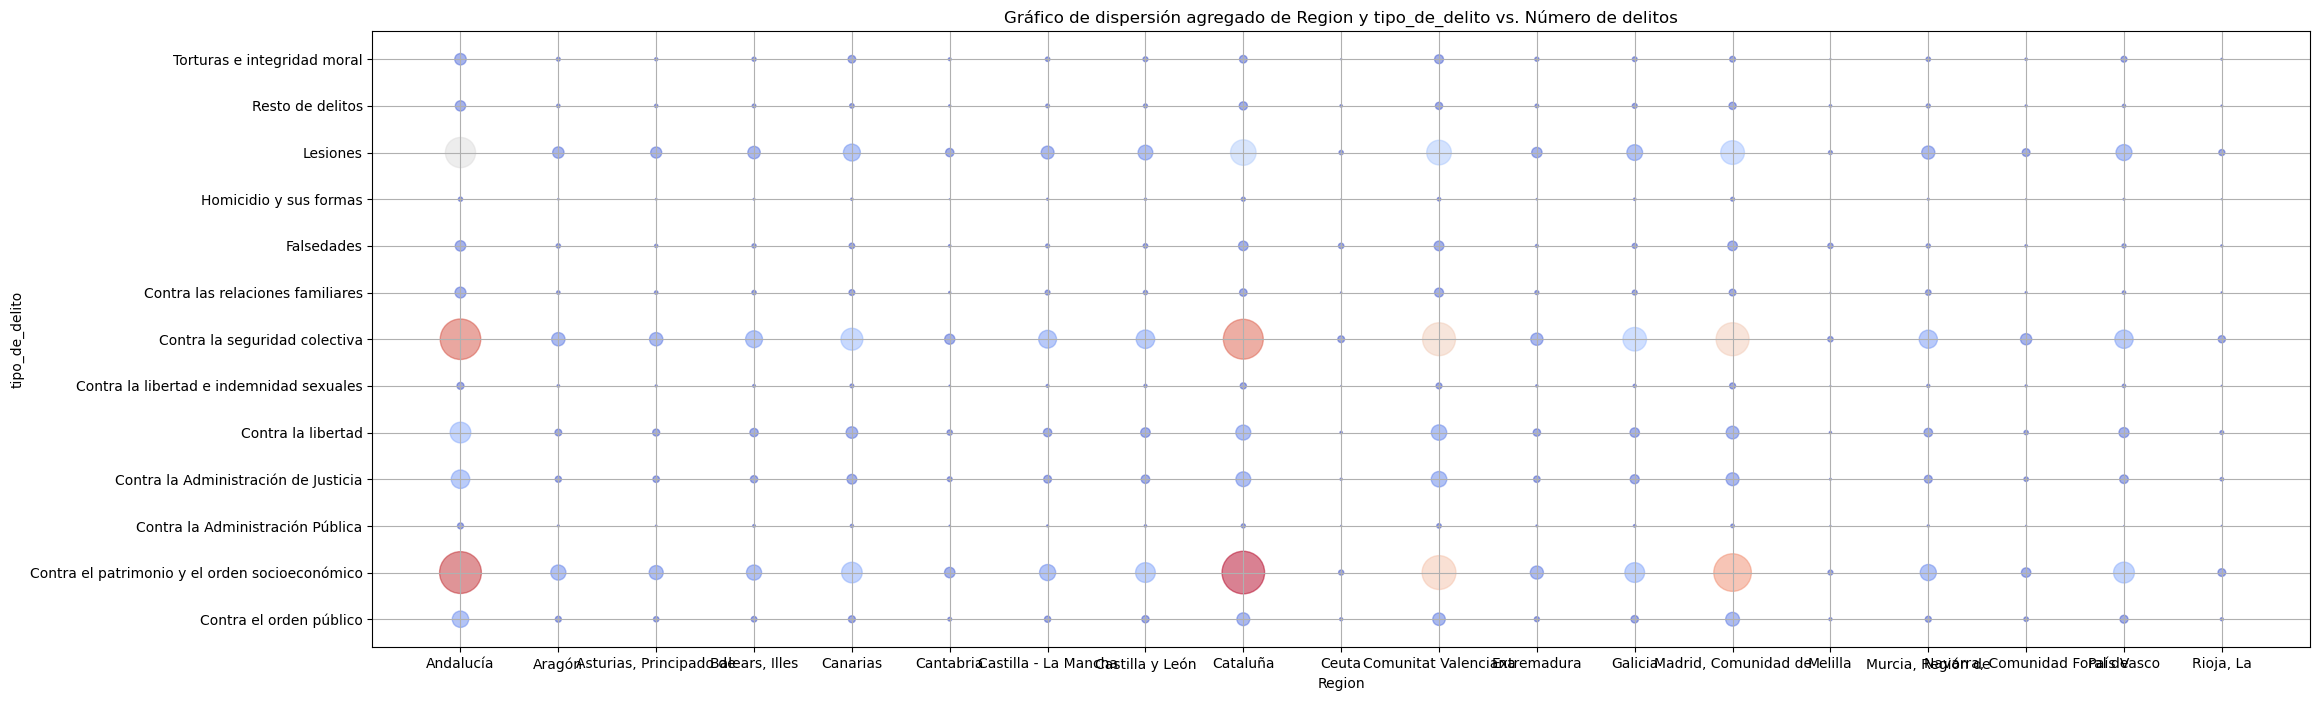

In [291]:
# Aggregate data


agg_df_delitotipo = df_filtered_summ.groupby(['edad', 'tipo_de_delito']).agg({'final_value': 'mean'}).reset_index()
agg_df_region = df_filtered_summ.groupby(['edad', 'Region']).agg({'final_value': 'mean'}).reset_index()
agg_df_cross = df_filtered_summ.groupby(['tipo_de_delito', 'Region']).agg({'final_value': 'mean'}).reset_index()
def plot_delito_data(df, group_by,dime):

    # Aggregate data
    agg_df = df.groupby([dime, group_by]).agg({'final_value': 'mean'}).reset_index()
    
    # Plot
    plt.figure(figsize=(25, 8))
    plt.scatter(agg_df[dime], agg_df[group_by], s=agg_df['final_value'] * 0.4, alpha=0.5, c=agg_df['final_value'], cmap='coolwarm')
    plt.title(f'Gráfico de dispersión agregado de {dime} y {group_by} vs. Número de delitos')
    plt.xlabel(f'{dime}')
    plt.ylabel(group_by)
    plt.grid(True)
    plt.show()


plot_delito_data(agg_df_delitotipo, 'tipo_de_delito','edad')
plot_delito_data(agg_df_region, 'Region','edad')
plot_delito_data(agg_df_cross, 'tipo_de_delito','Region')


In [292]:
#Prediction of no of delitos considering age and type of delito as regressor

In [293]:
#First using Prophet

In [294]:
#!pip install prophet

In [295]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib  # for saving the encoder model

# Initialize the encoders
tipo_de_delito_encoder = LabelEncoder()
edad_encoder = LabelEncoder()
region_encoder = LabelEncoder()
df_filtered_summ = df_filtered_summ.drop(['tipo_de_delito_encoded','Region_encoded','edad_encoded'], axis=1, errors='ignore')
# Assuming your DataFrame 'df' has 'type_of_delito' and 'age' columns
df_filtered_summ['tipo_de_delito_encoded'] = tipo_de_delito_encoder.fit_transform(df_filtered_summ['tipo_de_delito'])
df_filtered_summ['edad_encoded'] = edad_encoder.fit_transform(df_filtered_summ['edad'])
df_filtered_summ['region_encoded'] = region_encoder.fit_transform(df_filtered_summ['Region'])

In [296]:
# Save the encoders for future use
joblib.dump(tipo_de_delito_encoder, 'tipo_de_delito_encoder.joblib')
joblib.dump(edad_encoder, 'edad_encoder.joblib')
joblib.dump(region_encoder, 'region_encoder.joblib')

['region_encoder.joblib']

In [297]:
from prophet  import Prophet
import pandas as pd

# Prepare your DataFrame for Prophet
df_filtered_summ['ds'] = pd.to_datetime(df_filtered_summ['año'].astype(str) + '-12-31')
df_filtered_summ['y'] = df_filtered_summ['final_value']


In [298]:
    # Initialize and fit the Prophet model with additional regressors
model = Prophet(yearly_seasonality=False,changepoint_prior_scale=0.10)
model.add_regressor('edad_encoded',  prior_scale=100)
model.add_regressor('tipo_de_delito_encoded', prior_scale=100)
model.add_regressor('region_encoded', prior_scale=100)
model.fit(df_filtered_summ[['ds','region_encoded','tipo_de_delito_encoded','edad_encoded','y']], algorithm='LBFGS', iter=20000)

17:12:38 - cmdstanpy - INFO - Chain [1] start processing
17:12:39 - cmdstanpy - INFO - Chain [1] done processing


In [299]:
#prediction paarmeters input
edad_category = "De 31 a 35 años"
tipo_de_delito = "Homicidio y sus formas"
region_input = "Canarias"
año_de_predicción = 2025

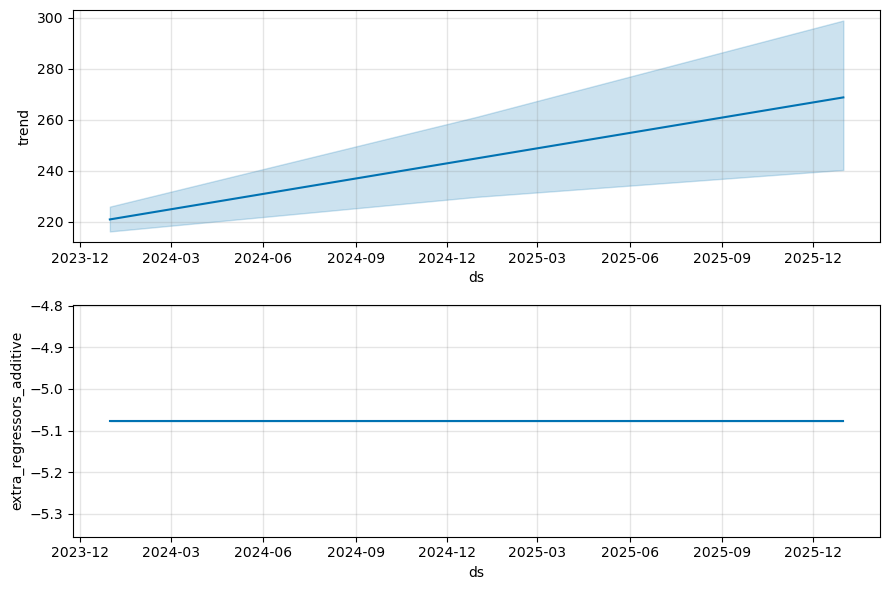

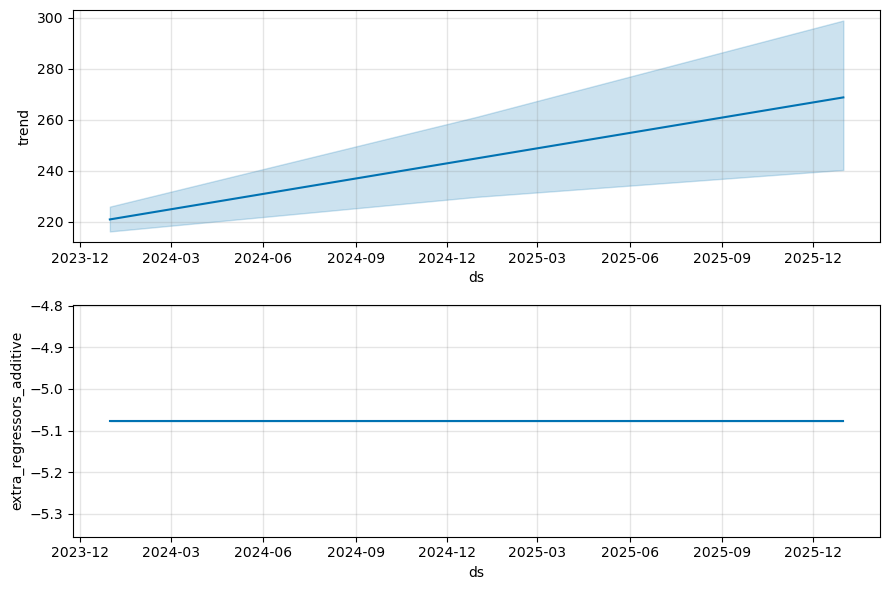

In [300]:
import matplotlib.pyplot as plt

# Load encoders
loaded_tipo_de_delito_encoder = joblib.load('tipo_de_delito_encoder.joblib')
loaded_edad_encoder = joblib.load('edad_encoder.joblib')
loaded_region_encoder = joblib.load('region_encoder.joblib')
# Encode input parameters
input_edad_encoded = loaded_edad_encoder.transform([edad_category])[0]
input_tipo_de_delito_encoded = loaded_tipo_de_delito_encoder.transform([tipo_de_delito])[0]
input_region_encoded = loaded_region_encoder.transform([region_input])[0]
# Prepare future DataFrame for Prophet
last_known_year = df_filtered_summ['ds'].dt.year.max()
future_years = list(range(last_known_year + 1, año_de_predicción + 1))
future_dates = pd.to_datetime([f"{year}-12-31" for year in future_years])
future_df = pd.DataFrame({'ds': future_dates})

future_df['region_encoded'] = input_region_encoded
future_df['tipo_de_delito_encoded'] = input_tipo_de_delito_encoded
future_df['edad_encoded'] = input_edad_encoded



Pronóstico = model.predict(future_df[['ds','region_encoded','tipo_de_delito_encoded','edad_encoded']])
model.plot_components(Pronóstico)


In [301]:
from prophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2013-12-31', '2021-12-31'])
df_cv = cross_validation(model,horizon = '365 days',initial = '2920 days', period = '365 days')
df_cv.head() 

  0%|          | 0/1 [00:00<?, ?it/s]

17:12:42 - cmdstanpy - INFO - Chain [1] start processing
17:12:44 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-12-31,196.345835,-364.703021,707.710712,2.149420,2021-12-31
1,2022-12-31,343.426582,-204.347815,892.473454,11.608822,2021-12-31
2,2022-12-31,338.524624,-218.561297,877.707327,31.978435,2021-12-31
3,2022-12-31,333.622667,-186.419679,878.592256,16.370612,2021-12-31
4,2022-12-31,328.720709,-159.308300,846.713430,8.390672,2021-12-31


In [302]:
#METRICS ACCORDING TO THE HORIZON
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,247792.530143,497.787636,267.734517,119.196829,6.042555,1.351857,0.939721


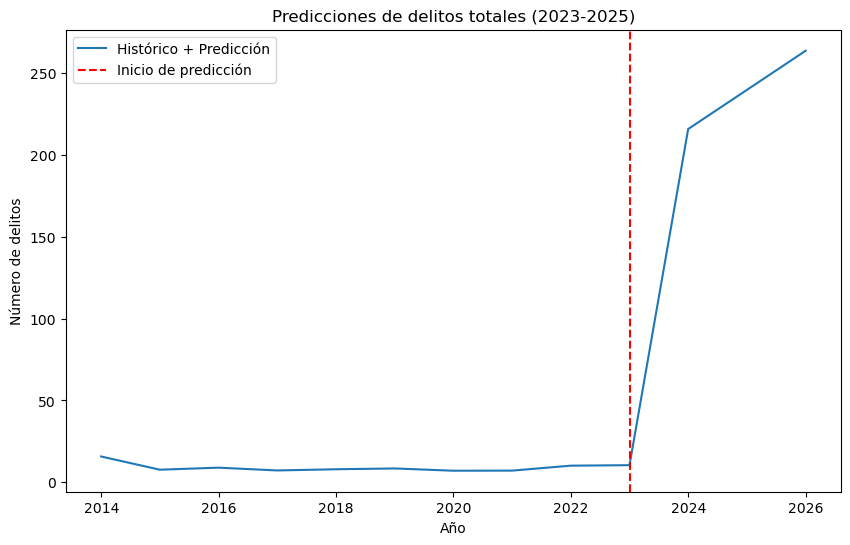

In [303]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Combine historical and forecast data for plotting
historical_data =  df_filtered_summ[(df_filtered_summ['edad_encoded'] == input_edad_encoded) & (df_filtered_summ['tipo_de_delito_encoded'] == input_tipo_de_delito_encoded) & (df_filtered_summ['region_encoded'] == input_region_encoded)]
Pronóstico_data = Pronóstico[['ds', 'yhat']].rename(columns={'yhat': 'y'})
combined_data = pd.concat([historical_data, Pronóstico_data])
combined_data = combined_data.sort_values(by='ds')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(combined_data['ds'], combined_data['y'], label='Histórico + Predicción')
plt.axvline(x=pd.to_datetime('2023'), color='r', linestyle='--', label='Inicio de predicción')
plt.xlabel('Año')
plt.ylabel('Número de delitos')
plt.title('Predicciones de delitos totales (2023-2025)')
plt.legend()
plt.show()

In [304]:
#Model is not ideal for varibales with additional regressor 



In [305]:
#!pip install lightgbm

In [306]:
df_filtered_summ = df_filtered_summ.sort_values(by=['edad_encoded', 'region_encoded','tipo_de_delito_encoded', 'ds'])
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby(['edad_encoded', 'region_encoded','tipo_de_delito_encoded'])['y'].shift(1)
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby(['edad_encoded', 'region_encoded','tipo_de_delito_encoded'])['y'].shift(2)
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby(['edad_encoded', 'region_encoded','tipo_de_delito_encoded'])['y'].shift(3)
# Fill missing values in lagged columns with the first available 'y' value in each group
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby(['edad_encoded','region_encoded', 'tipo_de_delito_encoded'])['y_lag1'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby(['edad_encoded','region_encoded', 'tipo_de_delito_encoded'])['y_lag2'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby(['edad_encoded', 'region_encoded','tipo_de_delito_encoded'])['y_lag3'].transform(lambda x: x.fillna(method='bfill'))

df_filtered_summ['y'] = df_filtered_summ['y'].astype(float)

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


cutoff_date = df_filtered_summ['ds'].max() - pd.DateOffset(years=2)

# Split your dataset based on the cutoff date
train_df = df_filtered_summ[df_filtered_summ['ds'] <= cutoff_date][['edad_encoded', 'region_encoded','tipo_de_delito_encoded', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
test_df = df_filtered_summ[df_filtered_summ['ds'] > cutoff_date][['edad_encoded', 'region_encoded','tipo_de_delito_encoded', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
# Split the data into training and testing sets
X_train = train_df.drop(['ds', 'y'], axis=1)
y_train = train_df['y']
X_test = test_df.drop(['ds', 'y'], axis=1)
y_test = test_df['y']

In [308]:
# Initialize and train the LightGBM model
from lightgbm import LGBMRegressor
model = LGBMRegressor(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=1000
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l2')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 17784, number of used features: 6
[LightGBM] [Info] Start training from score 153.597616


LGBMRegressor(learning_rate=0.05, n_estimators=1000)

In [309]:
import numpy as np
# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE de prueba: {rmse}')

RMSE de prueba: 122.1150557866342


In [310]:
unique_edad_categories = df_filtered_summ['edad'].unique() 
unique_tipo_de_delito = df_filtered_summ['tipo_de_delito'].unique() 
unique_regions = df_filtered_summ['Region'].unique()  
año_de_predicción = 2025
#dummy intialization for prediction storage frame
final_pred_df_lgbm = df_filtered_summ[df_filtered_summ['edad_encoded'] == '111111111']
# Iterate over each unique combination
for edad_category in unique_edad_categories:
    for tipo_de_delito in unique_tipo_de_delito:
        for region_input in unique_regions:
            # Encode input parameters for the current combination
            input_edad_encoded = loaded_edad_encoder.transform([edad_category])[0]
            input_tipo_de_delito_encoded = loaded_tipo_de_delito_encoder.transform([tipo_de_delito])[0]
            input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filter df_filtered_summ for the current combination
            specific_filter = (df_filtered_summ['edad_encoded'] == input_edad_encoded) & \
                              (df_filtered_summ['tipo_de_delito_encoded'] == input_tipo_de_delito_encoded) & \
                              (df_filtered_summ['region_encoded'] == input_region_encoded)
            filtered_for_specific = df_filtered_summ[specific_filter]

            if not filtered_for_specific.empty:
                filtered_for_specific = filtered_for_specific.sort_values('ds')
                last_date = filtered_for_specific['ds'].max()
                last_year = last_date.year

                for year in range(last_year + 1, año_de_predicción + 1):
                    # Assuming your model needs at least 1 record to make a prediction
                    if len(filtered_for_specific) >= 1:
                        # Prepare input data for prediction using the last available records
                        most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                        most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                        most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                        predict_df = pd.DataFrame({
                            'edad_encoded': [input_edad_encoded],
                            'region_encoded': [input_region_encoded],
                            'tipo_de_delito_encoded': [input_tipo_de_delito_encoded],
                            'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                        # Make the prediction
                        predicted_y = model.predict(predict_df)[0]
                        # Create a new entry for the prediction
                        new_date = pd.Timestamp(year, 12, 31)
                        new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'edad_encoded': input_edad_encoded,
                            'region_encoded': input_region_encoded,
                            'tipo_de_delito_encoded': input_tipo_de_delito_encoded,
                            'edad': edad_category,
                            'tipo_de_delito': tipo_de_delito,
                            'Region': region_input,
                        }

                        # Append the new entry to filtered_for_specific for continuity
                        new_entry_df = pd.DataFrame([new_entry])
                        filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
                final_pred_df_lgbm = pd.concat([final_pred_df_lgbm, filtered_for_specific], ignore_index=True)[['ds','Region','tipo_de_delito','edad','y','Value']]
            else:
                print(f"No se encontraron datos históricos para la edad: {edad_category}, Tipo de delito: {tipo_de_delito}, Región: {region_input}.")

    

In [ ]:
file_path = r'Predicción completa para LGBM reg con retrasos construidos (región, edad, tipo de delito).xlsx'
final_pred_df_lgbm.to_excel(file_path, index=False, engine='openpyxl')
final_pred_df_lgbm.dtypes

ds                datetime64[ns]
Region                    object
tipo_de_delito            object
edad                      object
y                        float64
Value                    float64
dtype: object

In [ ]:
# Dictionary to store the maximum forecasted delito value for each combination
max_pronosticados = {}

# Loop through each combination to fill the dictionary
for edad in unique_edad_categories:
    for region in unique_regions:
        for tipo_de_delito in unique_tipo_de_delito:
            df_current = final_pred_df_lgbm[
                (final_pred_df_lgbm['edad'] == edad) & 
                (final_pred_df_lgbm['Region'] == region) & 
                (final_pred_df_lgbm['tipo_de_delito'] == tipo_de_delito)]

            Datos_pronosticado = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]
            if not Datos_pronosticado.empty:
                max_pronosticado = Datos_pronosticado['y'].max()
                max_pronosticados[(edad, region, tipo_de_delito)] = max_pronosticado

# Sort the dictionary by value and get the top 10 combinations
top_10_combinations = sorted(max_pronosticados, key=max_pronosticados.get, reverse=True)[:10]

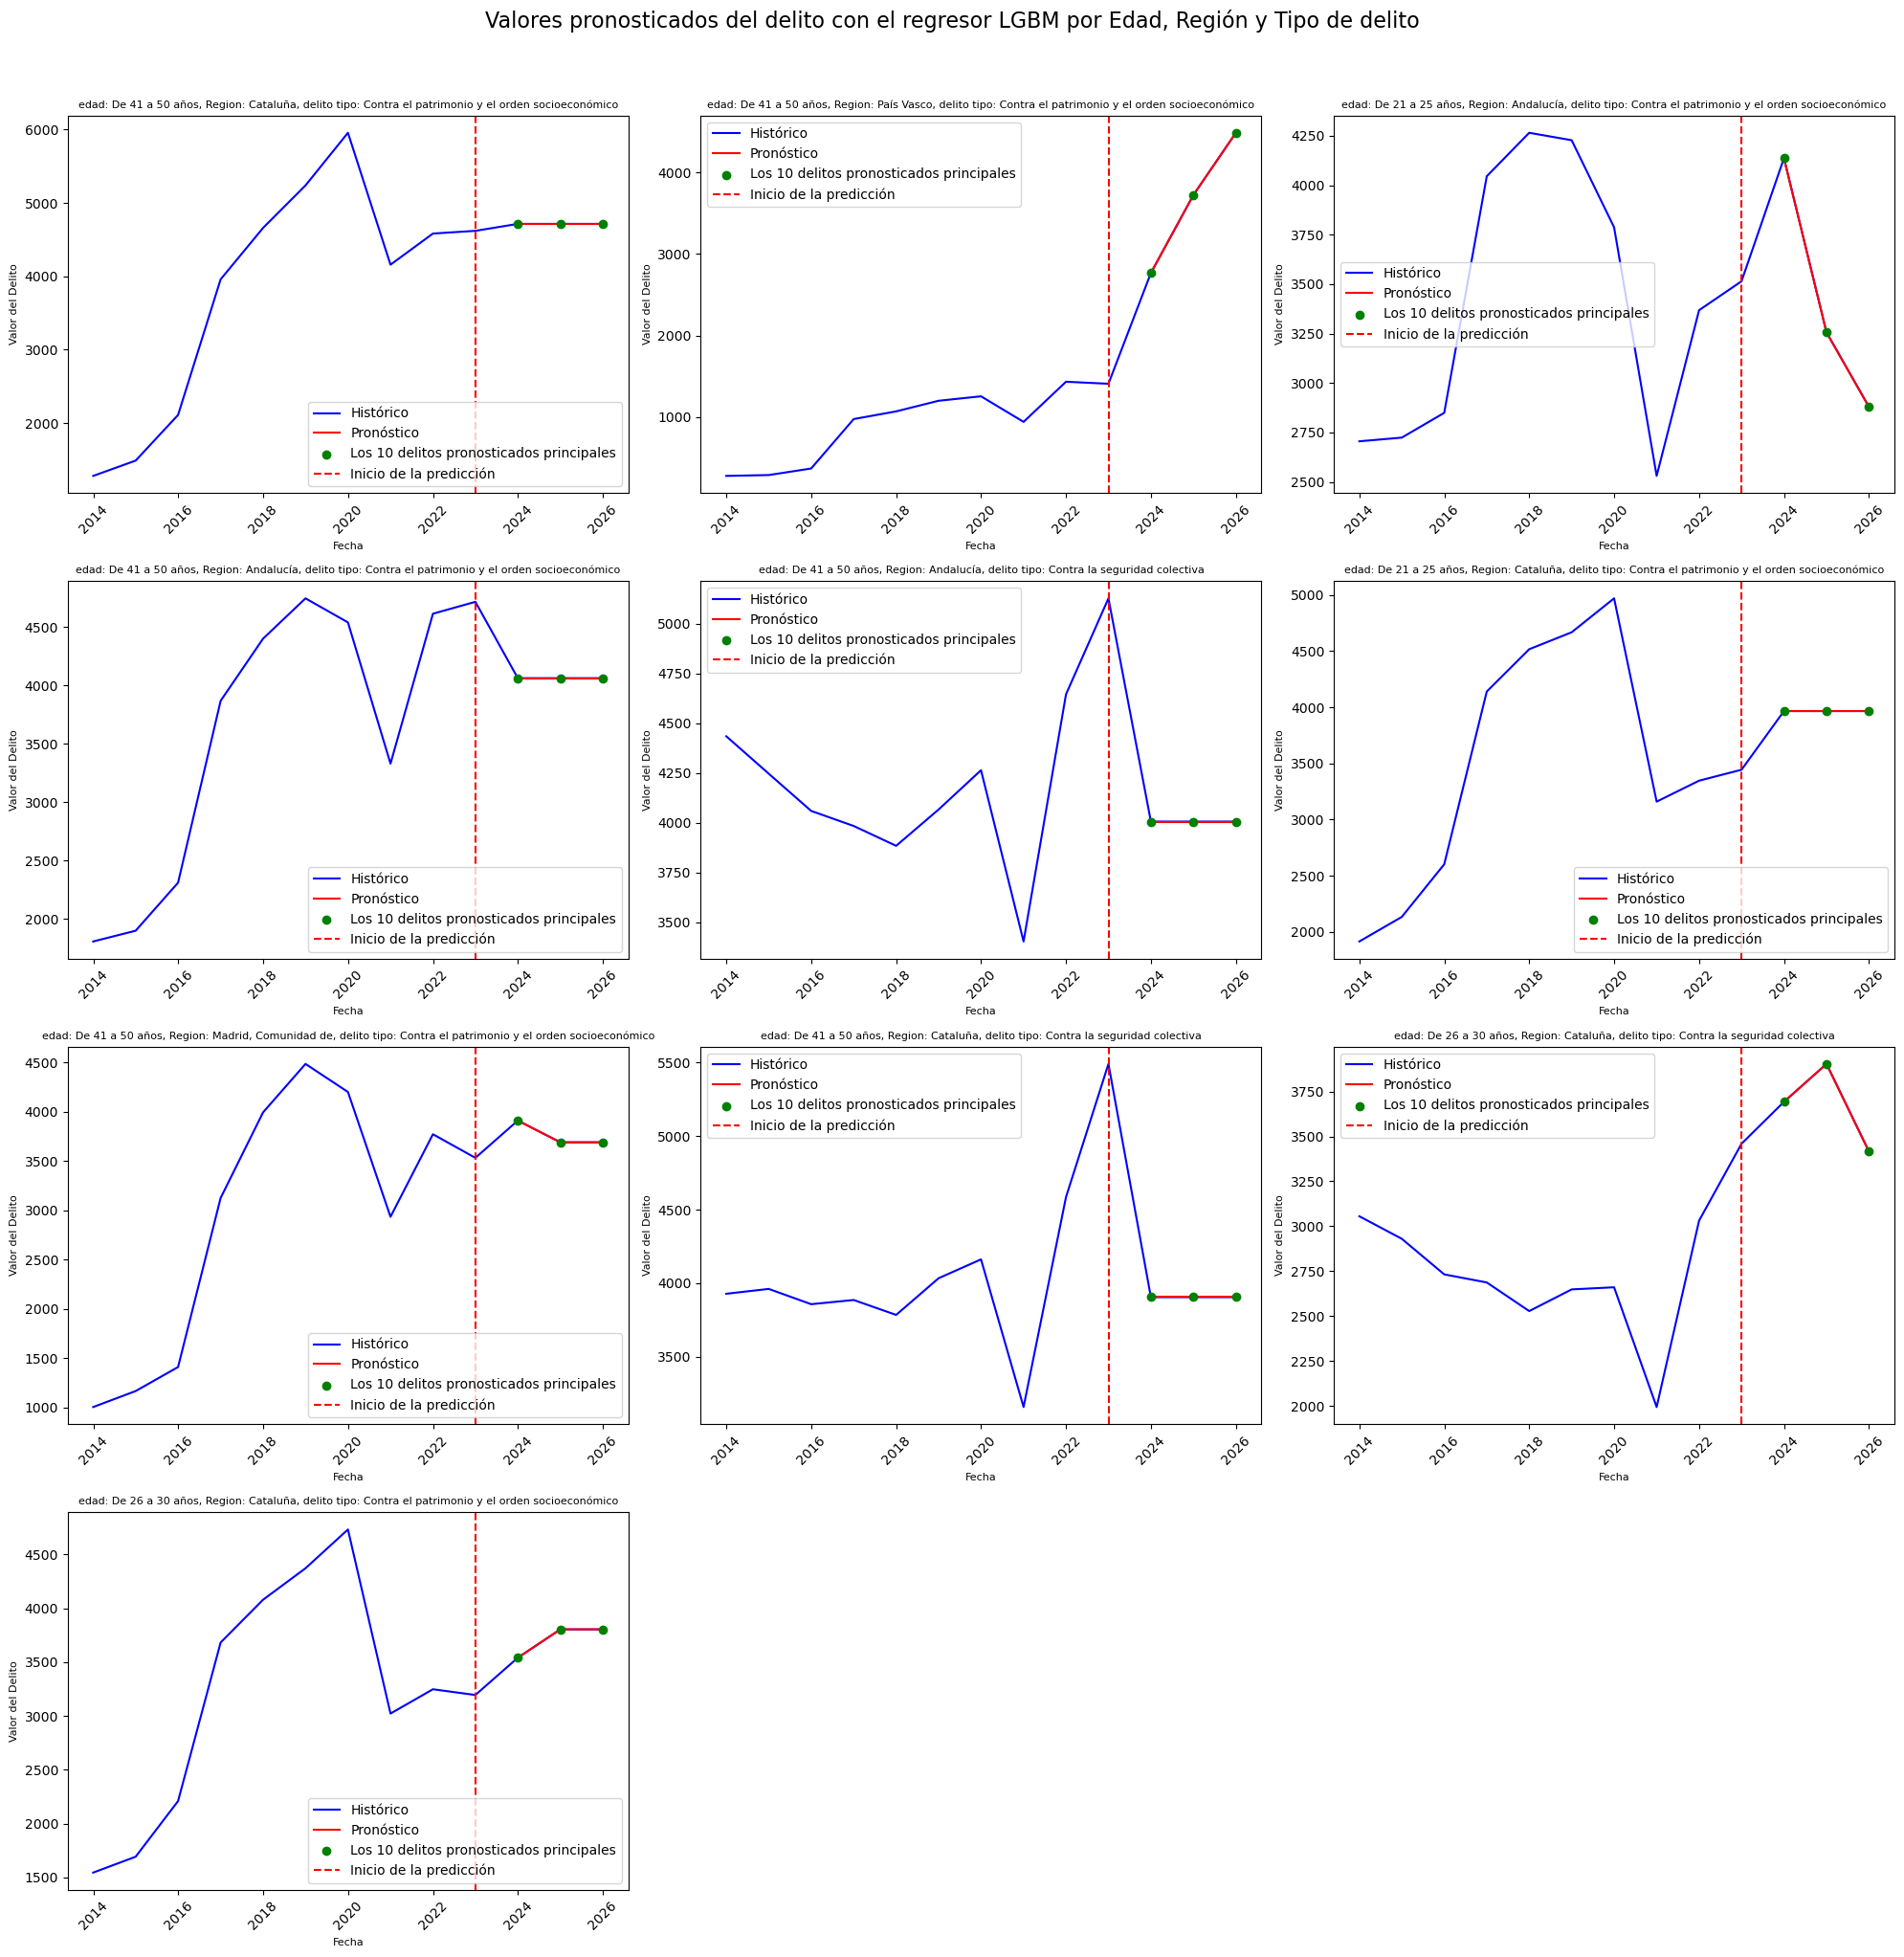

In [ ]:
# Calculate grid dimensions
num_combinations = len(top_10_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Valores pronosticados del delito con el regresor LGBM por Edad, Región y Tipo de delito', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_10_combinations):
    edad, region, tipo_de_delito = combination
    df_current = final_pred_df_lgbm[
        (final_pred_df_lgbm['edad'] == edad) & 
        (final_pred_df_lgbm['Region'] == region) & 
        (final_pred_df_lgbm['tipo_de_delito'] == tipo_de_delito)]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current
    Datos_pronosticado = df_current[df_current['ds'] > latest_date]
    

    axs[i].plot(historical_data['ds'], historical_data['y'], label='Histórico', color='blue')
    axs[i].plot(Datos_pronosticado['ds'], Datos_pronosticado['y'], label='Pronóstico', color='red')

    # Highlight top 10 forecasted values in this segment
    top_forecasted = Datos_pronosticado.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Los 10 delitos pronosticados principales')

    axs[i].set_title(f"edad: {edad}, Region: {region}, delito tipo: {tipo_de_delito}", fontsize=8)
    axs[i].set_xlabel('Fecha', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Inicio de la predicción')
    axs[i].set_ylabel('Valor del Delito', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Turn off axes for any remaining subplots
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
#Preidction using linear regerssion model considering three lags

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("Error Cuadrático Medio Raíz de la Regresión Lineal:", rmse_linear)

Error Cuadrático Medio Raíz de la Regresión Lineal: 163.0794434363587


In [ ]:
unique_edad_categories = df_filtered_summ['edad'].unique() 
unique_tipo_de_delito = df_filtered_summ['tipo_de_delito'].unique() 
unique_regions = df_filtered_summ['Region'].unique()  
prediction_year = 2025
#dummy intialization for prediction storage frame
final_pred_df_linreg = df_filtered_summ[df_filtered_summ['edad_encoded'] == '111111111']
# Iterate over each unique combination
for edad_category in unique_edad_categories:
    for tipo_de_delito in unique_tipo_de_delito:
        for region_input in unique_regions:
            # Encode input parameters for the current combination
            input_edad_encoded = loaded_edad_encoder.transform([edad_category])[0]
            input_tipo_de_delito_encoded = loaded_tipo_de_delito_encoder.transform([tipo_de_delito])[0]
            input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filter df_filtered_summ for the current combination
            specific_filter = (df_filtered_summ['edad_encoded'] == input_edad_encoded) & \
                              (df_filtered_summ['tipo_de_delito_encoded'] == input_tipo_de_delito_encoded) & \
                              (df_filtered_summ['region_encoded'] == input_region_encoded)
            filtered_for_specific = df_filtered_summ[specific_filter]

            if not filtered_for_specific.empty:
                filtered_for_specific = filtered_for_specific.sort_values('ds')
                last_date = filtered_for_specific['ds'].max()
                last_year = last_date.year

                for year in range(last_year + 1, prediction_year + 1):
                    # Assuming your model needs at least 1 record to make a prediction
                    if len(filtered_for_specific) >= 1:
                        # Prepare input data for prediction using the last available records
                        most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                        most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                        most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                        predict_df = pd.DataFrame({
                            'edad_encoded': [input_edad_encoded],
                            'region_encoded': [input_region_encoded],
                            'tipo_de_delito_encoded': [input_tipo_de_delito_encoded],
                            'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                        # Make the prediction
                        predicted_y = model.predict(predict_df)[0]
                        # Create a new entry for the prediction
                        new_date = pd.Timestamp(year, 12, 31)
                        new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'edad_encoded': input_edad_encoded,
                            'region_encoded': input_region_encoded,
                            'tipo_de_delito_encoded': input_tipo_de_delito_encoded,
                            'edad': edad_category,
                            'tipo_de_delito': tipo_de_delito,
                            'Region': region_input,
                        }

                        # Append the new entry to filtered_for_specific for continuity
                        new_entry_df = pd.DataFrame([new_entry])
                        filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
                final_pred_df_linreg = pd.concat([final_pred_df_linreg, filtered_for_specific], ignore_index=True)[['ds','Region','tipo_de_delito','edad','y','Value']]
            else:
                print(f"No se encontraron datos históricos para la edad: {edad_category}, Tipo de delito: {tipo_de_delito}, Región: {region_input}.")

    

KeyboardInterrupt: 

In [ ]:
file_path = r'Predicción completa para regresión lineal con retrasos construidos (región, edad, tipo de delito).xlsx'
final_pred_df_linreg.to_excel(file_path, index=False, engine='openpyxl')
final_pred_df_linreg

,ds,Region,tipo_de_delito,edad,y,Value
0,2013-12-31,Andalucía,Contra el orden público,71 y más años,9.404190,3073.0
1,2014-12-31,Andalucía,Contra el orden público,71 y más años,7.220996,2914.0
2,2015-12-31,Andalucía,Contra el orden público,71 y más años,8.334667,2864.0
3,2016-12-31,Andalucía,Contra el orden público,71 y más años,12.561067,2964.0
4,2017-12-31,Andalucía,Contra el orden público,71 y más años,13.530468,3071.0
...,...,...,...,...,...,...
28894,2021-12-31,"Rioja, La",Torturas e integridad moral,De 61 a 70 años,2.024227,55.0
28895,2022-12-31,"Rioja, La",Torturas e integridad moral,De 61 a 70 años,2.403068,67.0
28896,2023-12-31,"Rioja, La",Torturas e integridad moral,De 61 a 70 años,2.866394,NaN
28897,2024-12-31,"Rioja, La",Torturas e integridad moral,De 61 a 70 años,3.580497,NaN


In [ ]:
# Dictionary to store the maximum forecasted delito value for each combination
max_forecasts = {}

# Loop through each combination to fill the dictionary
for edad in unique_edad_categories:
    for region in unique_regions:
        for tipos_de_delito in unique_tipo_de_delito:
            df_current = final_pred_df_linreg[
                (final_pred_df_linreg['edad'] == edad) & 
                (final_pred_df_linreg['Region'] == region) & 
                (final_pred_df_linreg['tipo_de_delito'] == tipo_de_delito)]

            datos_pronosticados = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]
            if not datos_pronosticados.empty:
                max_forecast = datos_pronosticados['y'].max()
                max_forecasts[(edad, region, tipo_de_delito)] = max_forecast

# Sort the dictionary by value and get the top 10 combinations
top_10_combinations = sorted(max_forecasts, key=max_forecasts.get, reverse=True)[:10]

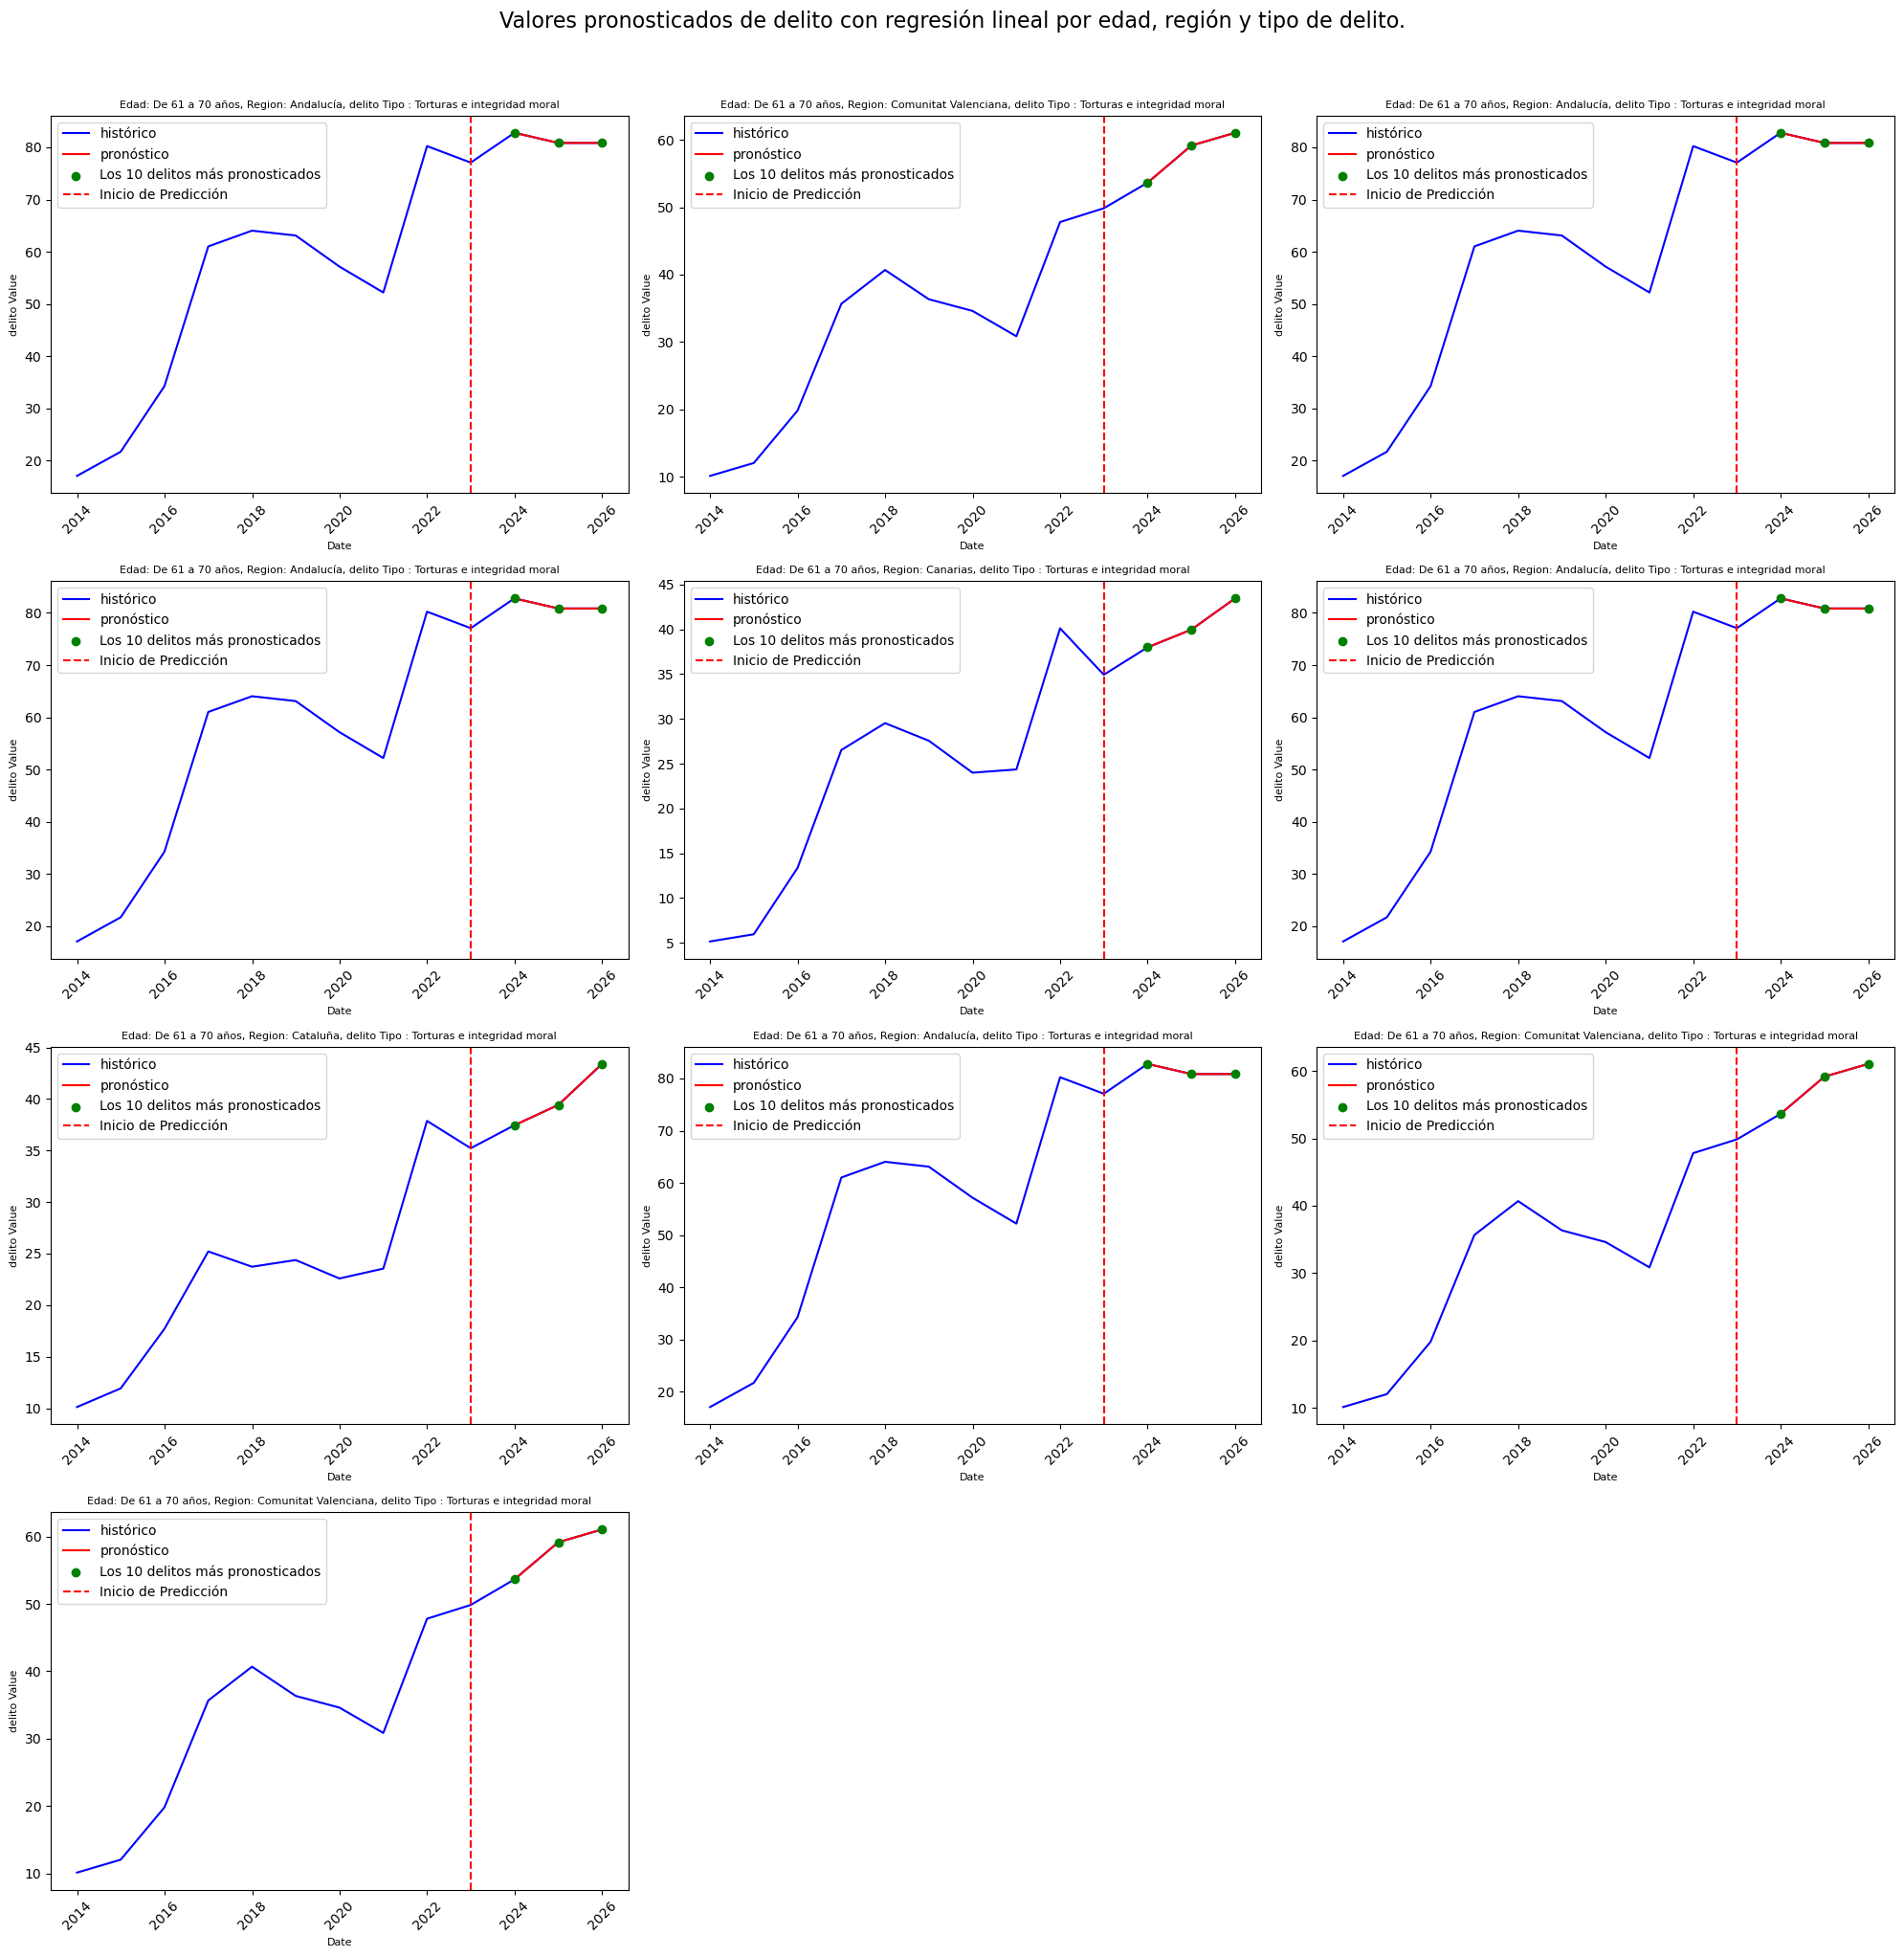

In [ ]:
# Calculate grid dimensions
num_combinations = len(top_10_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Valores pronosticados de delito con regresión lineal por edad, región y tipo de delito.', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_10_combinations):
    edad, region, type_of_delito = combination
    df_current = final_pred_df_linreg[
        (final_pred_df_linreg['edad'] == edad) & 
        (final_pred_df_linreg['Region'] == region) & 
        (final_pred_df_linreg['tipo_de_delito'] == tipo_de_delito)]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current
    forecasted_data = df_current[df_current['ds'] > latest_date]
    

    axs[i].plot(historical_data['ds'], historical_data['y'], label='histórico', color='blue')
    axs[i].plot(forecasted_data['ds'], forecasted_data['y'], label='pronóstico', color='red')

    # Highlight top 10 forecasted values in this segment
    top_forecasted = forecasted_data.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Los 10 delitos más pronosticados')

    axs[i].set_title(f"Edad: {edad}, Region: {region}, delito Tipo : {tipo_de_delito}", fontsize=8)
    axs[i].set_xlabel('Fecha', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Inicio de Predicción')
    axs[i].set_ylabel('Valor del Delito', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Turn off axes for any remaining subplots
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
#Now lets see Sepearate ARIMA model for each region, delito type and age category

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df_seperate_arima = df_filtered_summ[df_filtered_summ['region_encoded'] == input_region_encoded]

# Preparing the data structure to hold models
models = {}


for delito_tipo in df_seperate_arima['tipo_de_delito_encoded'].unique():
    models[delito_tipo] = {}
    for edad_group in df_seperate_arima['edad_encoded'].unique():
        models[delito_tipo][edad_group] = {}
        for region in df_seperate_arima['region_encoded'].unique():
            # Filter the dataset for each combination of 'Type of delito', 'Age', and 'Region'
            df_filt = df_seperate_arima[(df_seperate_arima['tipo_de_delito_encoded'] == delito_tipo) & 
                                        (df_seperate_arima['edad_encoded'] == edad_group) & 
                                        (df_seperate_arima['region_encoded'] == region)]
            
            # Check if there's enough data
            if len(df_filt) > 3:  # Adjust this threshold as needed
                df_filt.index = df_filt['ds']
                df_filt.index.freq = 'Y'
                ts = df_filt['y']
                
                # Try fitting the ARIMA model
                try:
                    model = ARIMA(ts, order=(1, 1, 1))  # Adjust order based on your data
                    fitted_model = model.fit()
                    
                    # Store the fitted model
                    models[delito_tipo][edad_group][region] = fitted_model
                except Exception as e:
                    print(f"La adaptación del modelo falló para el Tipo de Delito: {delito_tipo}, Edad: {edad_group}, Region: {region} con error: {e}")
            else:
                print(f"No hay suficientes datos para el Tipo de Delito:  {delito_tipo}, Edad: {edad_group}, Region: {region}")


d:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarni

C:\Users\mahes\AppData\Local\Temp\ipykernel_19528\2929232875.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


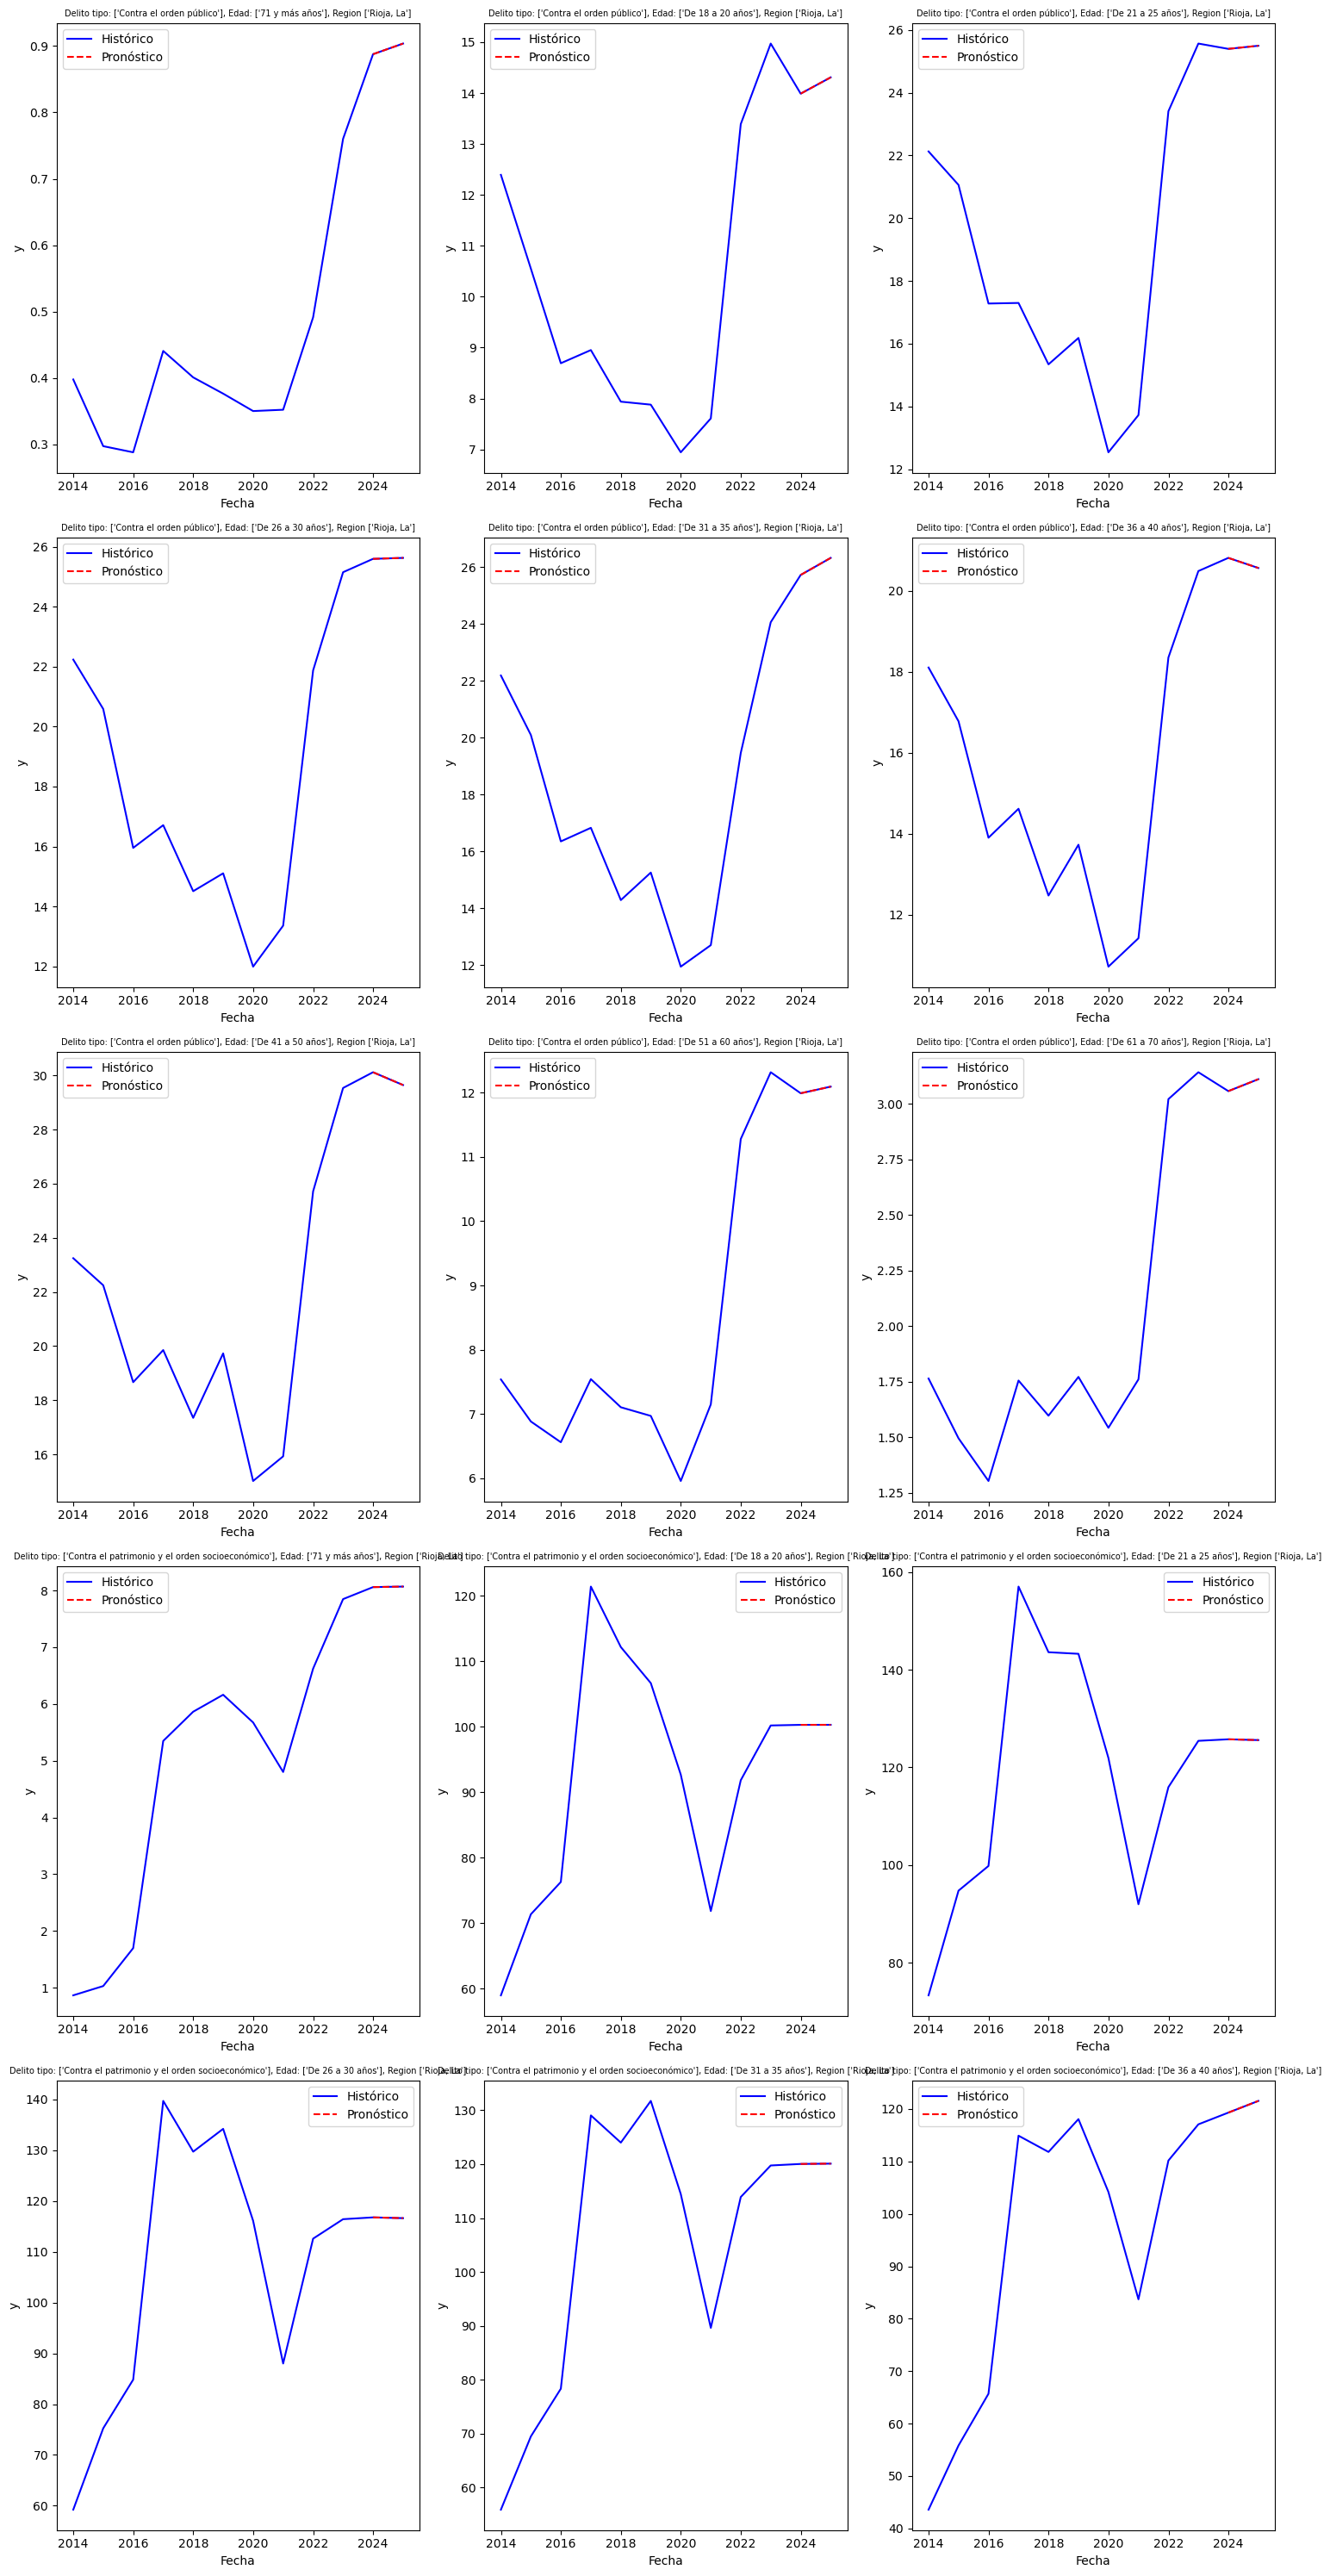

In [ ]:

import numpy as np
from datetime import datetime, timedelta

pronóstico_end = pd.to_datetime('2024-12-31')


combined_data = {}

for delito_tipo in models:
    combined_data[delito_tipo] = {}
    for edad_group in models[delito_tipo]:
        combined_data[delito_tipo][edad_group] = {}
        for region in models[delito_tipo][edad_group]:
            # Select the relevant historical data
            historical_data = df_seperate_arima[
                (df_seperate_arima['tipo_de_delito_encoded'] == delito_tipo) & 
                (df_seperate_arima['edad_encoded'] == edad_group) &
                (df_seperate_arima['region_encoded'] == region)
            ]
            
            # Forecast
            last_date = historical_data['ds'].max()
            steps = (pronóstico_end.year - last_date.year) 
            forecast = models[delito_tipo][edad_group][region].forecast(steps=steps)
            
            forecast_dates = pd.date_range(start=last_date +  timedelta(days=365), periods=len(forecast), freq='A')
            forecast_df = pd.DataFrame({
                'ds': forecast_dates, 
                'y': forecast, 
                'tipo_de_delito_encoded': delito_tipo, 
                'edad_encoded': edad_group,
                'region_encoded': region
            })
            
            # Combine historical and forecast data
            combined_df = pd.concat([historical_data, forecast_df], ignore_index=True)
            combined_data[delito_tipo][edad_group][region] = combined_df

plot_limit = 15
plot_count = 0

# Determine the layout of subplots
nrows = 5 
ncols = 3  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))  # Adjust the figsize as needed
fig.tight_layout(pad=6.0)

for delito_tipo in combined_data:
    if plot_count >= plot_limit: break
    for edad_group in combined_data[delito_tipo]:
        if plot_count >= plot_limit: break
        for region in combined_data[delito_tipo][edad_group]:
            if plot_count >= plot_limit: break
            
            ax = axes[plot_count // ncols, plot_count % ncols]
            combined_df = combined_data[delito_tipo][edad_group][region]
            
            # Plot historical data
            ax.plot(combined_df['ds'], combined_df['y'], label='Histórico', color='blue')
            
            forecast_df = combined_df[combined_df['ds'] > last_date]
            ax.plot(forecast_df['ds'], forecast_df['y'], label='Pronóstico', color='red', linestyle='--')
            ax.set_title(f"Delito tipo: {loaded_tipo_de_delito_encoder.inverse_transform([delito_tipo])}, Edad: {loaded_edad_encoder.inverse_transform([edad_group])}, Region {loaded_region_encoder.inverse_transform([region])}",fontsize=7)
            ax.set_xlabel('Fecha')
            ax.set_ylabel('y')
            ax.legend(loc='best')
            
            plot_count += 1

# Adjust unused subplots
for i in range(plot_count, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
#dont execute this is only for previous delitos loading and not used
import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    current_region_type = None
    current_edad_type = None
    encountered_region_type = False 
    encountered_sexo_type = False

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a delito type. 

        if  cell_a_value != None:
            if not cell_a_value[:1].isspace() :
                current_region_type = cell_a_value
                encountered_region_type = True  

                continue 
            
        if cell_a_value != None:
            if  cell_a_value[:4].isspace() and not cell_a_value[:5].isspace():
                current_sexo_type = cell_a_value
                encountered_sexo_type = True 

                continue 
            
        # After a delito type, the next rows are sex  until the next delito type.
        if cell_a_value != None:
            if not cell_a_value[:9].isspace():
                previousdelito = cell_a_value  

                for col in range(2, sheet.max_column + 1): 
                    year = sheet.cell(row=7, column=col).value 
                    value = sheet.cell(row=row, column=col).value
                    if value != None:
                        data.append([current_region_type,current_sexo_type, previousdelito, year, value])
                continue
        


    df = pd.DataFrame(data, columns=['Region', 'sexo','previousdelito' ,'Year', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'reincidencia.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['sexo'] = df['sexo'].str.strip()
df['previousdelito'] = df['previousdelito'].str.strip()

df = df[df['sexo'] != 'Total']
df = df[df['previousdelito'] != 'Total']

df_prevdelito = df
df_prevdelito


,Region,sexo,previousdelito,Year,Value
210,Andalucía,Hombres,Condenados con un delito,2022,36613
211,Andalucía,Hombres,Condenados con un delito,2021,32944
212,Andalucía,Hombres,Condenados con un delito,2020,25779
213,Andalucía,Hombres,Condenados con un delito,2019,32544
214,Andalucía,Hombres,Condenados con un delito,2018,33717
...,...,...,...,...,...
2995,Melilla,Mujeres,Condenados con cuatro o más delitos,2017,0
2996,Melilla,Mujeres,Condenados con cuatro o más delitos,2016,1
2997,Melilla,Mujeres,Condenados con cuatro o más delitos,2015,0
2998,Melilla,Mujeres,Condenados con cuatro o más delitos,2014,1
